In [153]:
import pandas as pd
import numpy as np
from plotnine import *
from mizani.formatters import comma_format, percent_format

execfile('/Users/andrewtynan/GitHub/Python_Functions/plotnine_functions/plot_col/plot_col.py')
execfile('/Users/andrewtynan/GitHub/Python_Functions/plotnine_functions/helpers/facet.py')

# Basic Examples

In [139]:
basic_df = pd.DataFrame({"age": [10, 20, 30, 40, 50],
                         "count": [5, 15, 25, 35, 45]}) 

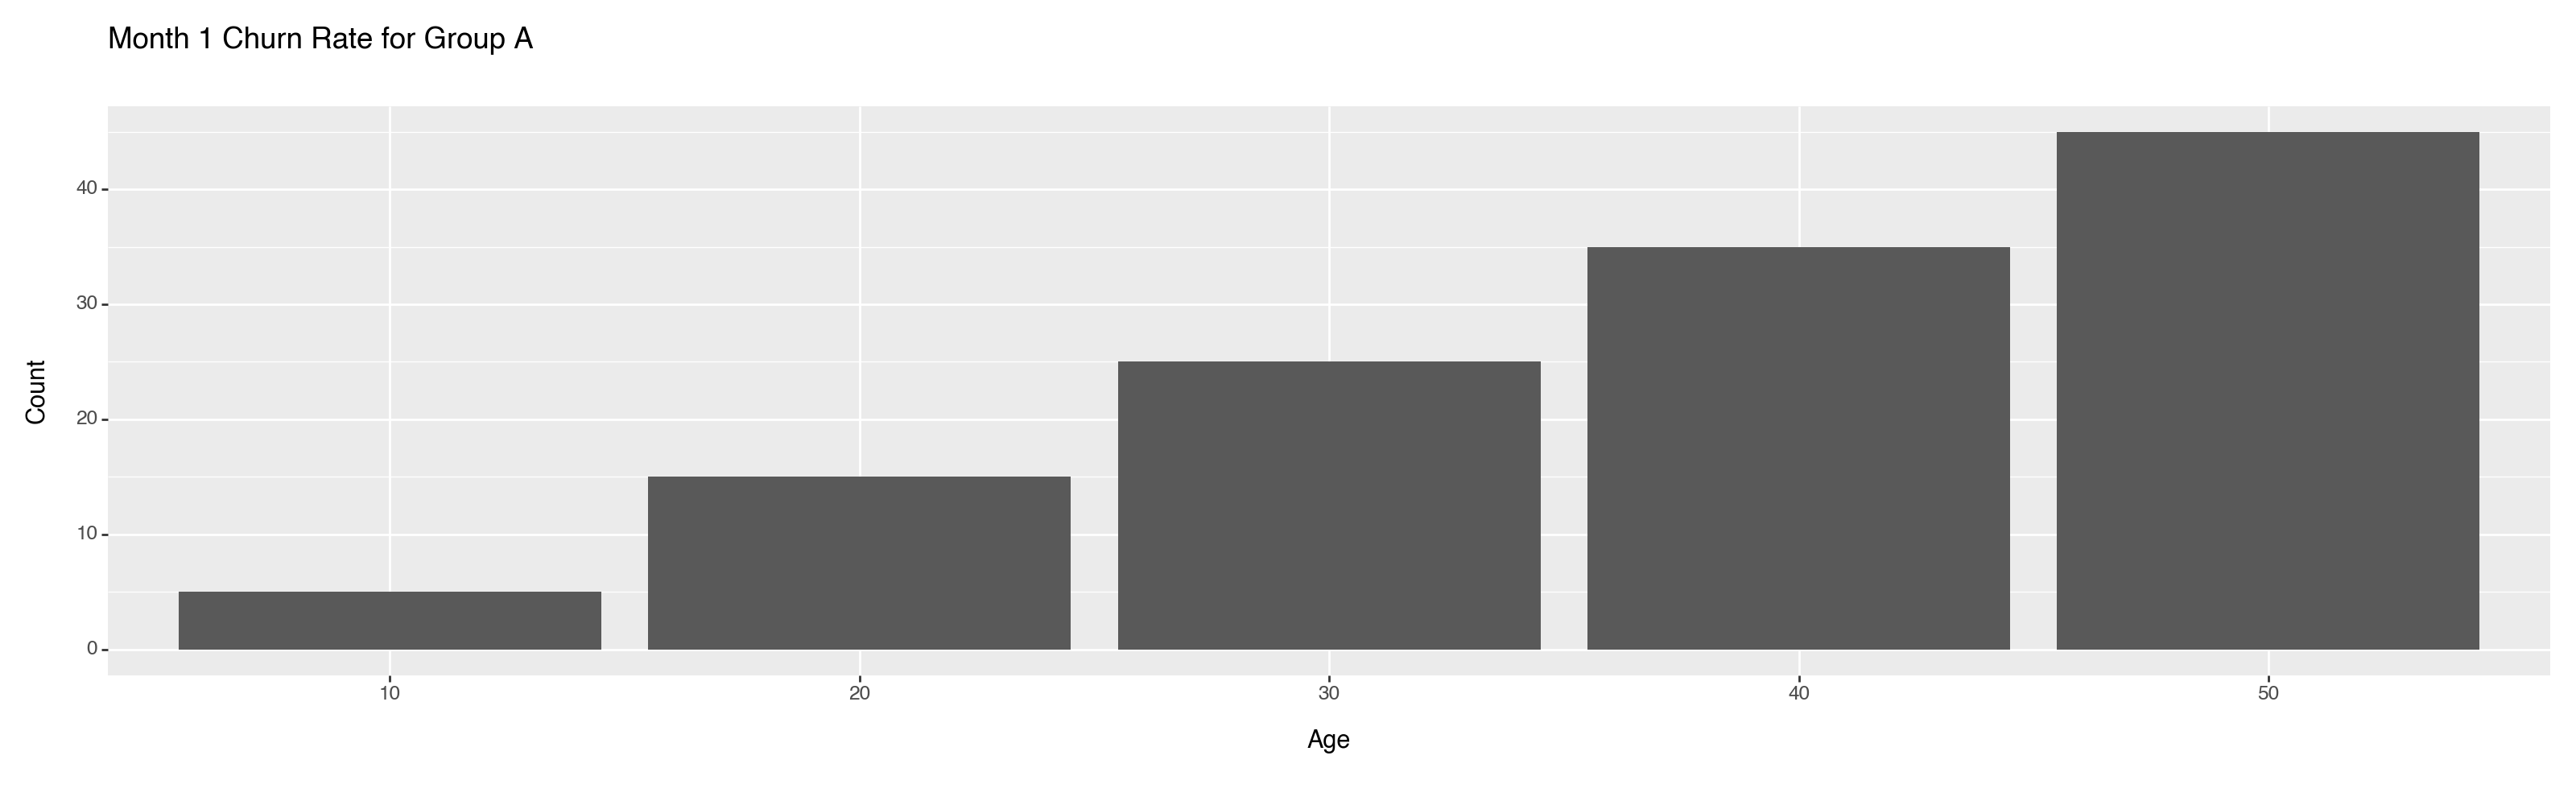

<Figure Size: (1600 x 500)>

In [154]:
(plot_col(basic_df, 
          x = 'factor(age)', # NOTE: need to make numeric values factor for better display
          y = 'count', 
          ) + 
theme(figure_size = (16, 5),
      legend_position='none') + 
labs(title="Counts by Age",
     x = 'Age'))             # NOTE: cleaning up the x axis label from 'factor(age)'

3


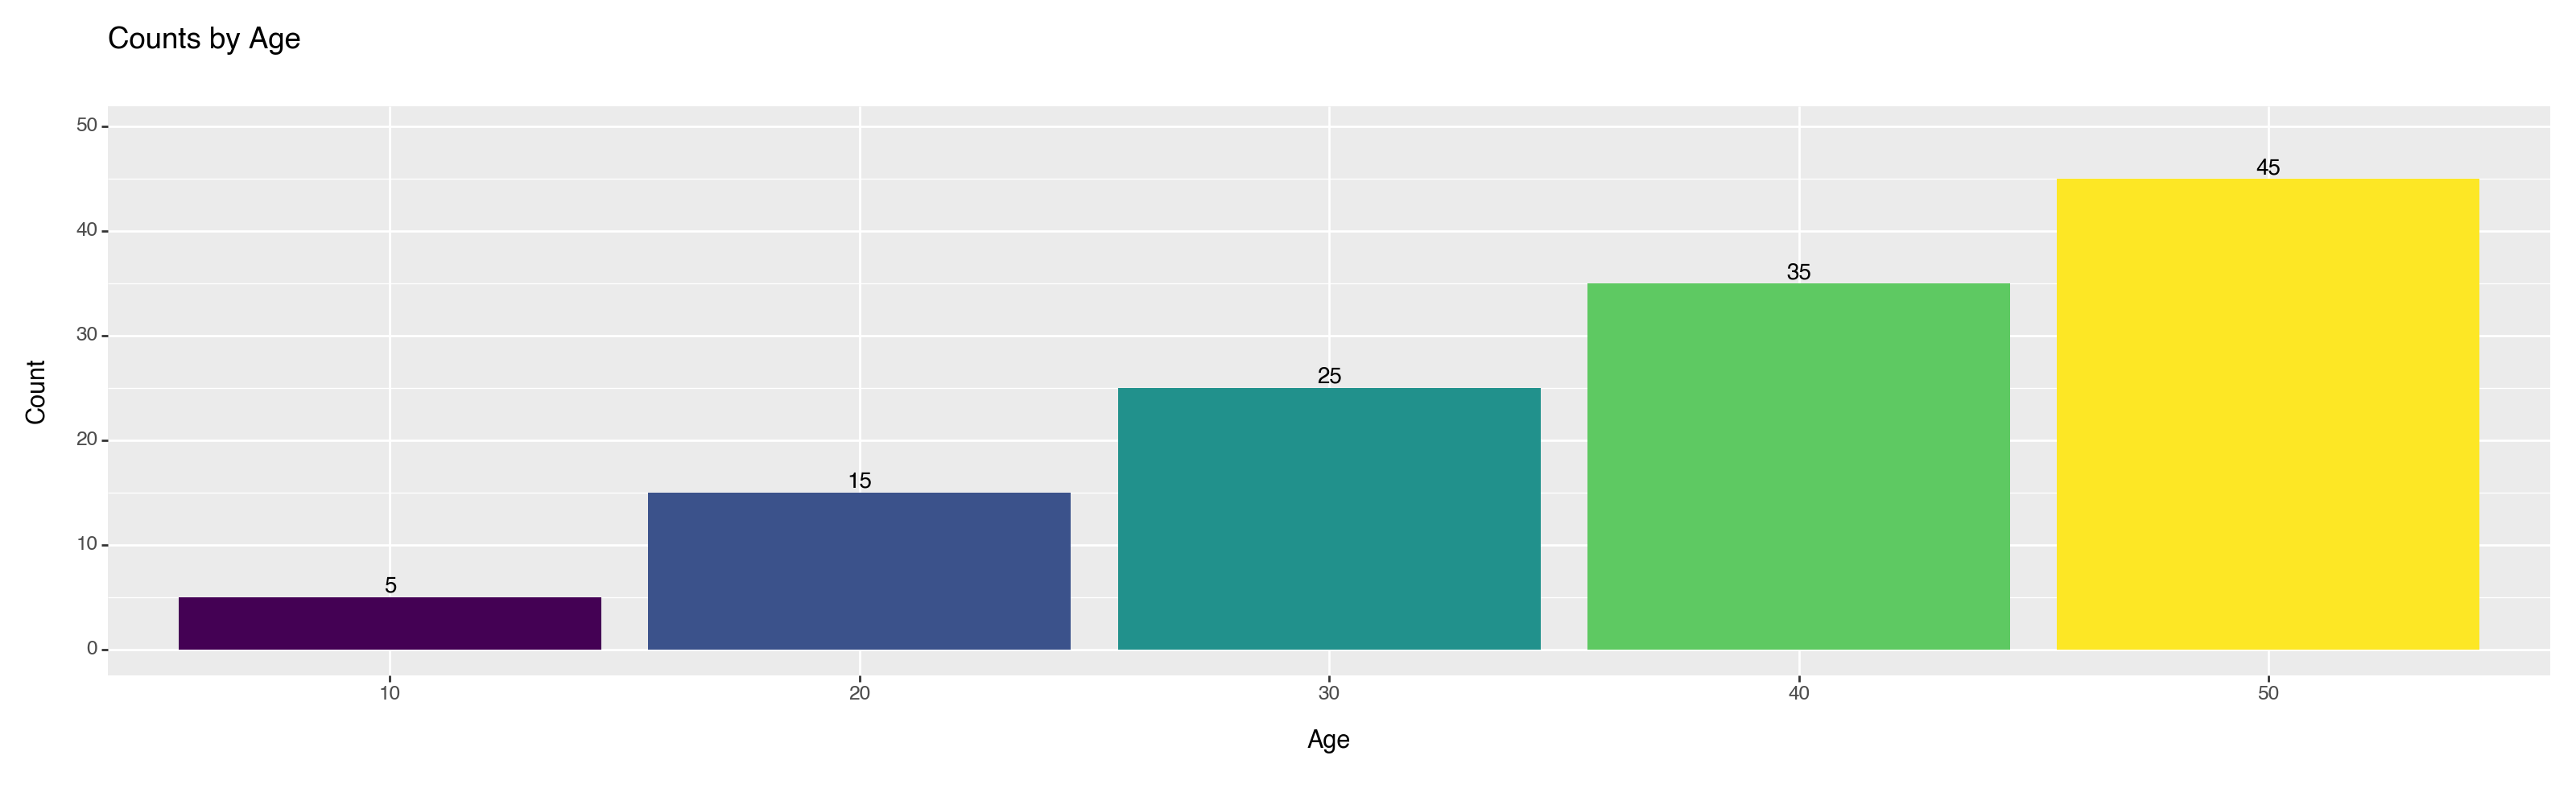

<Figure Size: (1600 x 500)>

In [156]:
(plot_col(basic_df, 
          x = 'factor(age)', # NOTE: need to make numeric values factor for better display
          y = 'count', 
          fill = 'count', # optional
          text = 'count', # optional
          ) + 
theme(figure_size = (16, 5),
      legend_position='none') + 
labs(title="Counts by Age",
     x = 'Age'))             # NOTE: cleaning up the x axis label from 'factor(age)'

# Nuanced Examples

In [101]:
date_range = pd.date_range(start="2022-01-01", end="2023-12-01", freq="MS")

base_df = pd.DataFrame({"year_month": date_range.strftime("%Y-%m"),
                        "group_member": np.random.choice(["Group A", "Group B", "Group C"], len(date_range)) })

# Expand the DataFrame to include lifetime_month (1 to 12 for each cohort)
df = base_df.loc[base_df.index.repeat(12)].reset_index(drop=True)
df["lifetime_month"] = np.tile(range(1, 13), len(base_df))

# Generate unique churn_rate curves for each group_member and year_month cohort
# Each group has its own base retention rate and decay speed
np.random.seed(42)  # For reproducibility
group_decay_factors = {"Group A": 0.6, "Group B": 0.8, "Group C": 1.0}  # Example decay factors
group_base_rates = {"Group A": 0.9, "Group B": 0.7, "Group C": 0.5}  # Example base rates

# Function to calculate churn rate for a specific group_member and year_month
def generate_churn_rate(row):
    base_rate = group_base_rates[row["group_member"]]
    decay_factor = group_decay_factors[row["group_member"]]
    lifetime_effect = 1.0 / (1 + np.exp((row["lifetime_month"] - 6) / decay_factor))  # Sigmoid decay
    cohort_random_effect = np.random.uniform(0.95, 1.05)  # Small random variation by cohort
    return base_rate * lifetime_effect * cohort_random_effect


df["churn_rate"] = df.apply(generate_churn_rate, axis=1)

# print(df.to_string())

1


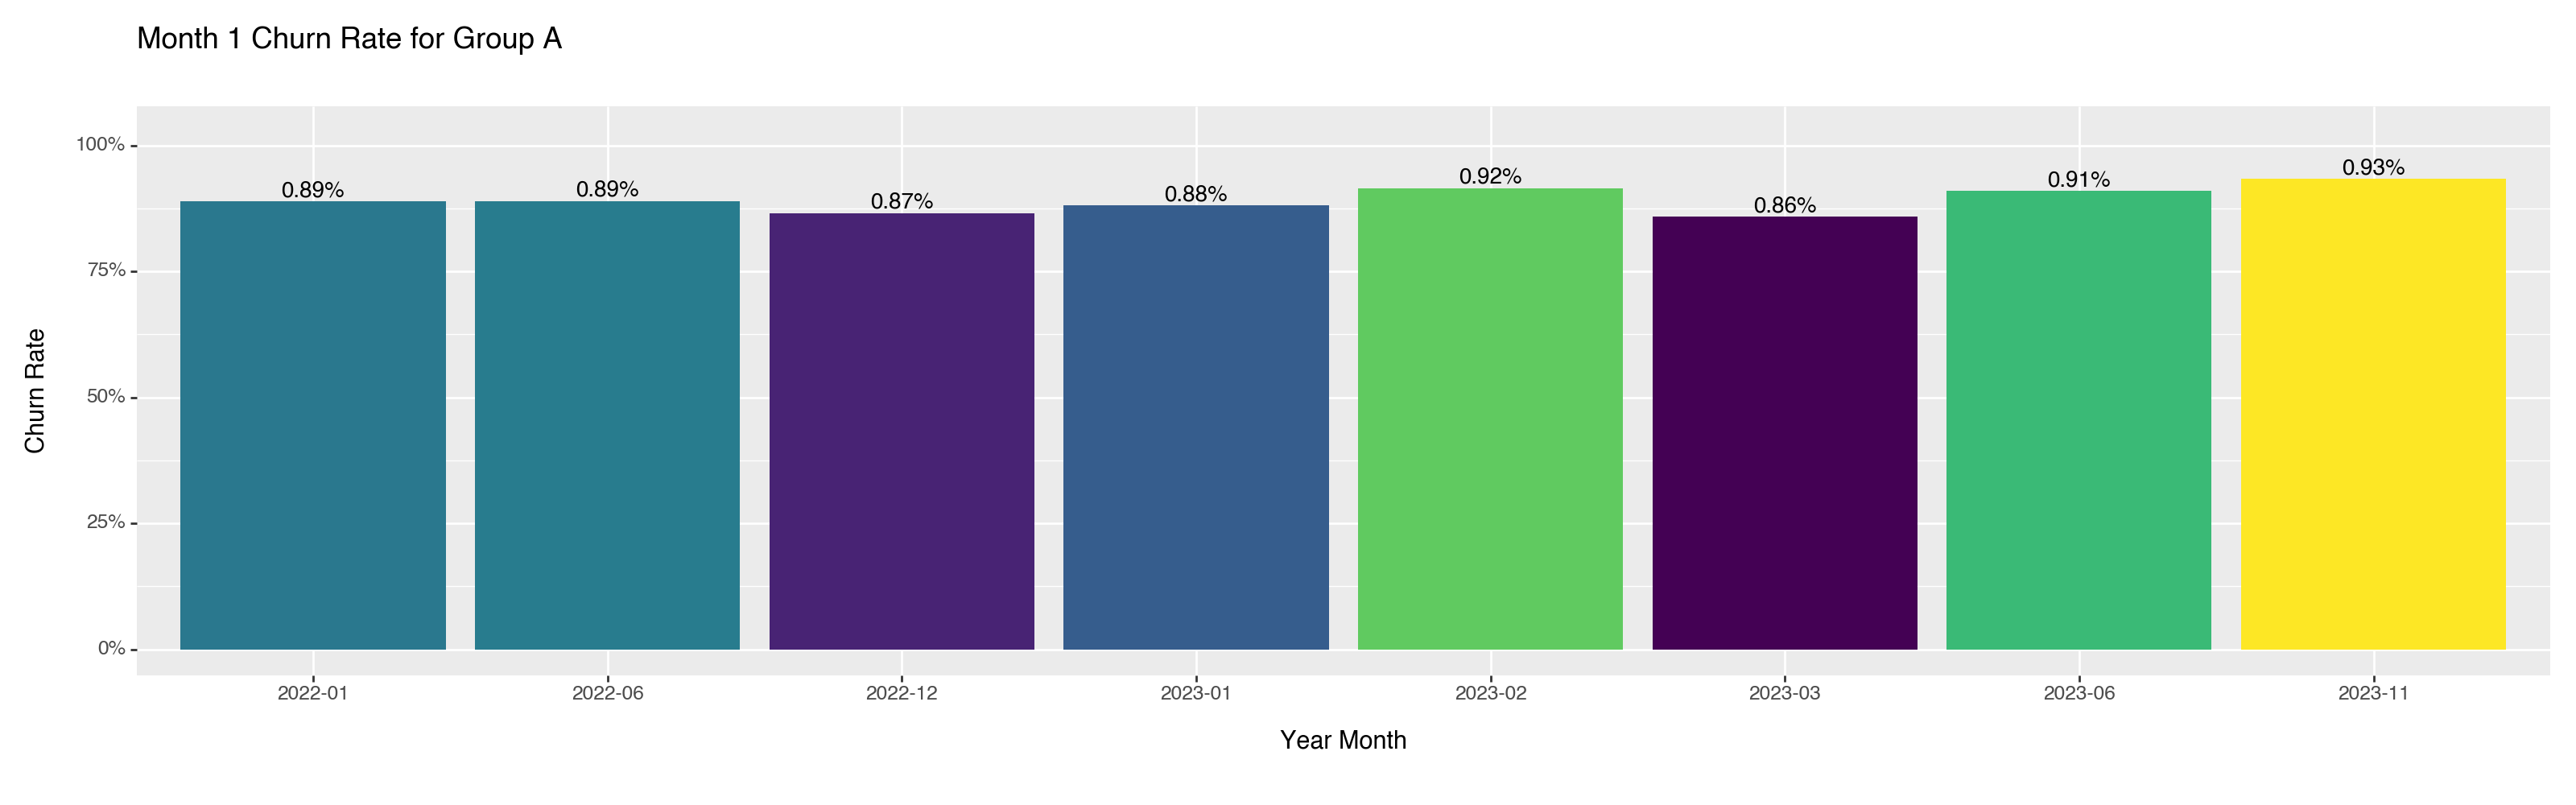

<Figure Size: (1600 x 500)>

In [158]:
(plot_col(df.query('lifetime_month == 1 & group_member == "Group A"'),
          x = 'year_month', 
          y = 'churn_rate', 
          fill = 'churn_rate', 
          text = 'churn_rate', 
          percent = 'churn_rate',
          position = 'dodge') + 
theme(figure_size = (16, 5),
      legend_position='none') + 
labs(title="Month 1 Churn Rate for Group A"))

2


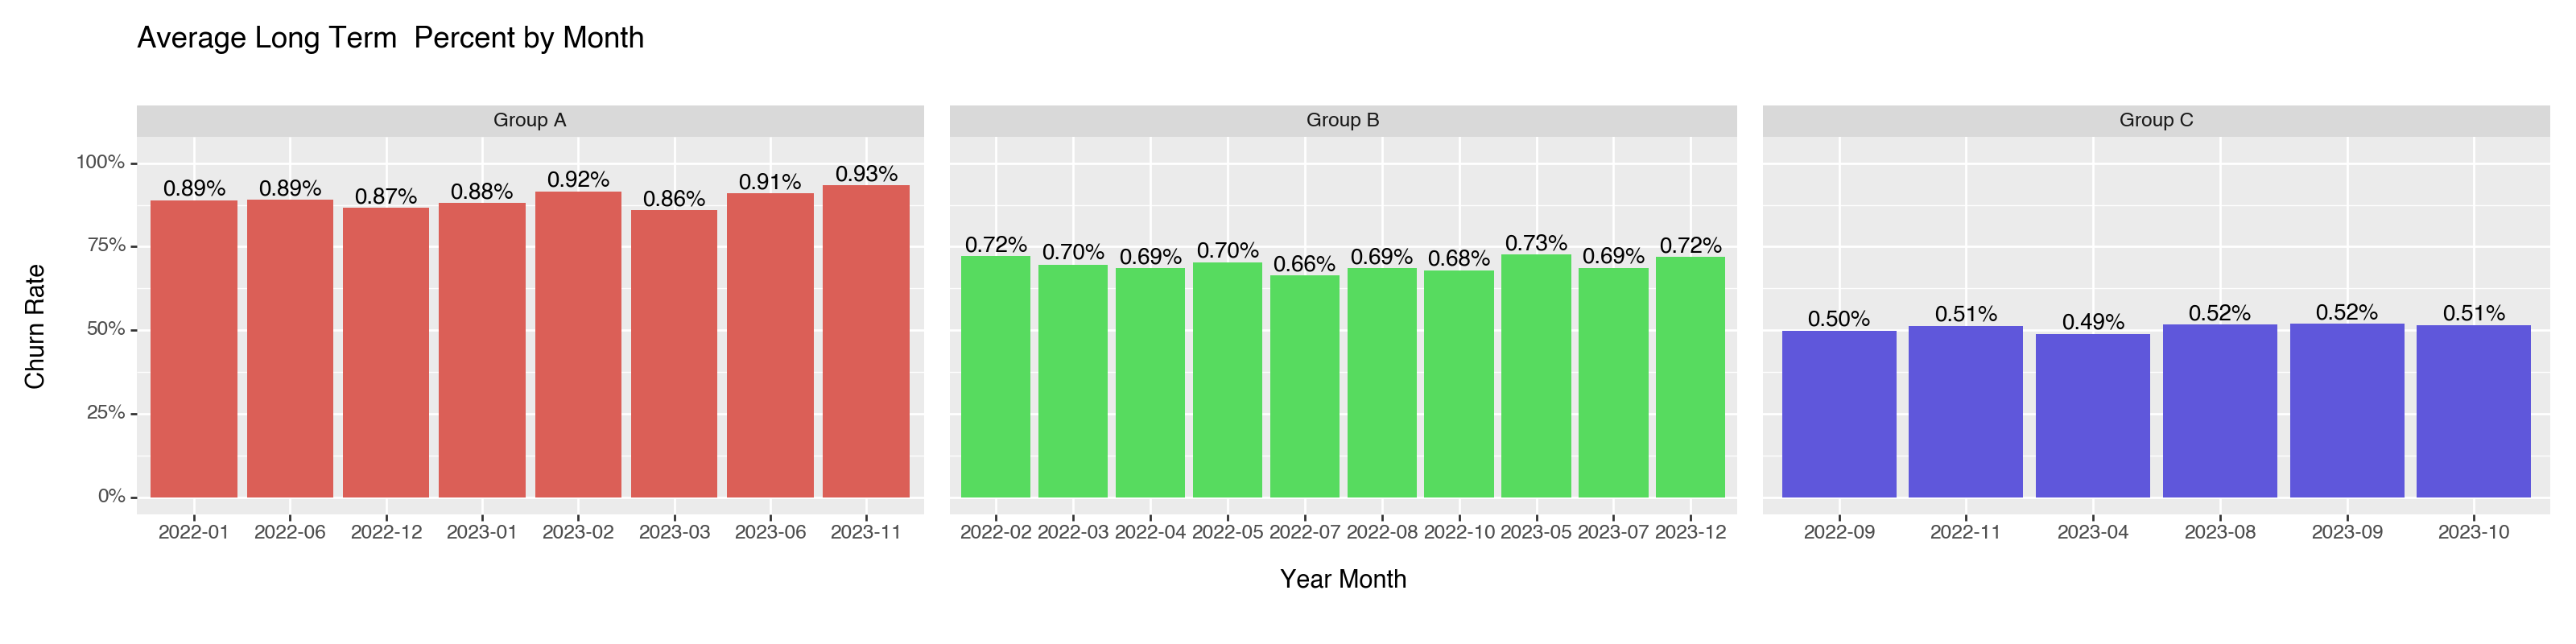

<Figure Size: (1600 x 400)>

In [123]:
(plot_col(df.query("lifetime_month == 1"), 
          x = 'year_month', 
          y = 'churn_rate', 
          fill = 'group_member', 
          text = 'churn_rate', 
          percent = 'churn_rate',
          facet = 'group_member', 
          facet_scales = 'free_x', 
          # position = 'stack' # NOTE: can be specified or not 
          ) + 
theme(figure_size = (16, 4),
      legend_position='none') + 
labs(title="Average Long Term  Percent by Month"))

1


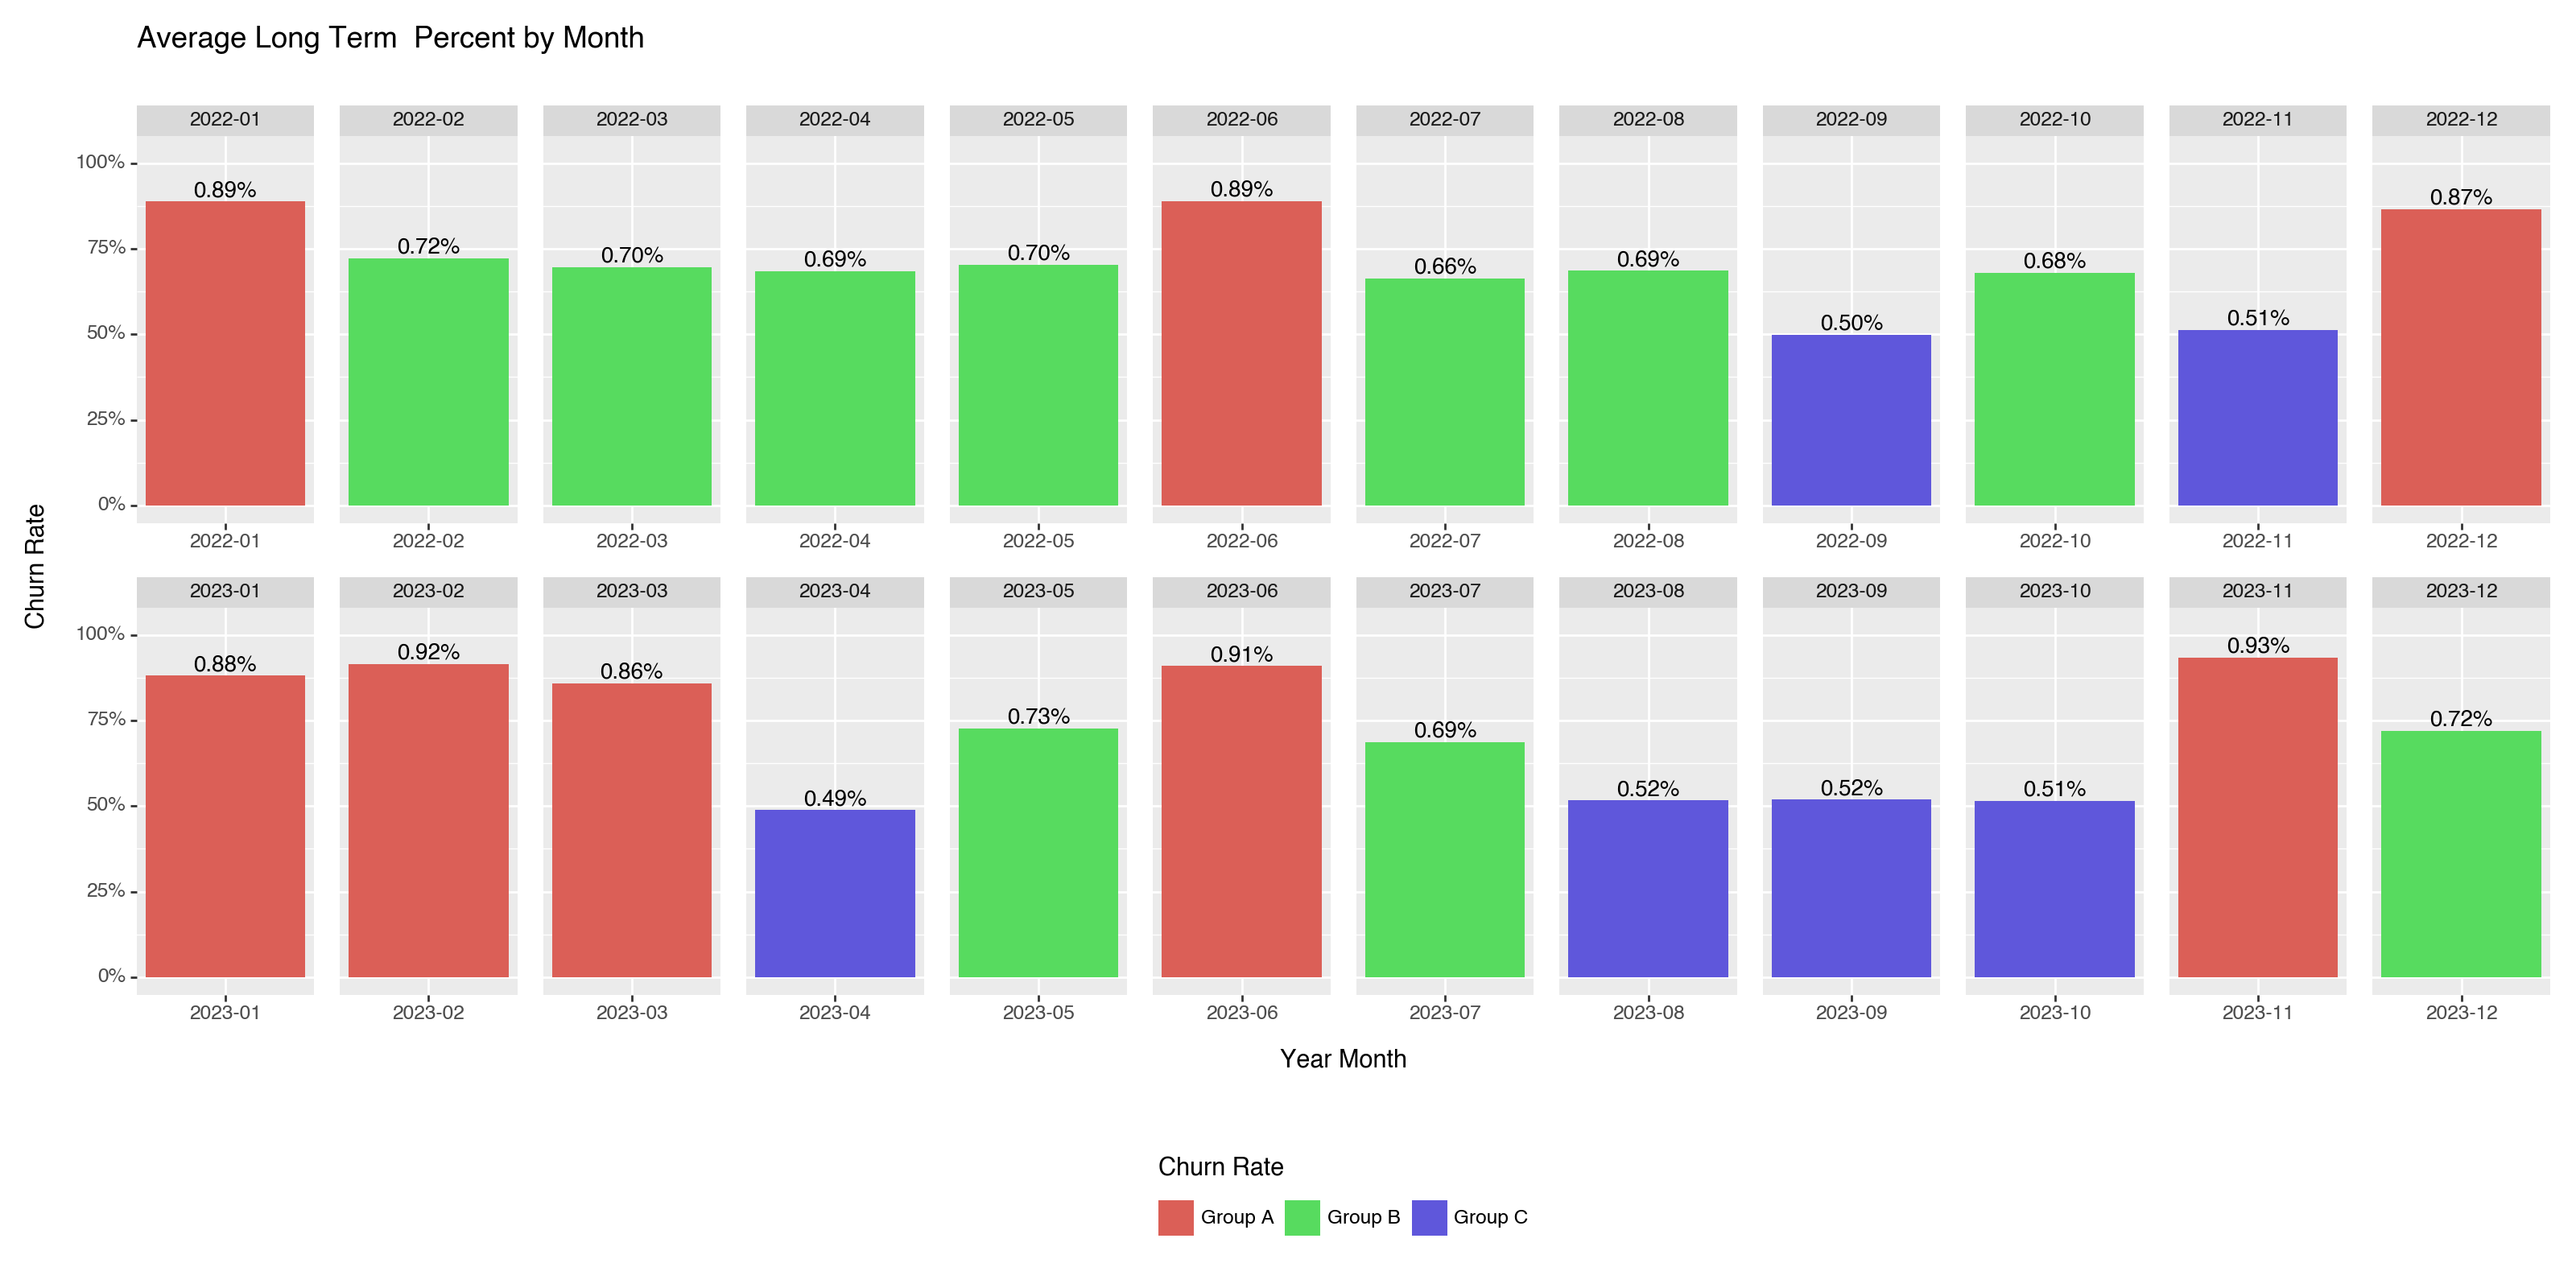

<Figure Size: (1600 x 800)>

In [124]:
(plot_col(df.query("lifetime_month == 1"), 
          'year_month', 
          'churn_rate', 
          'group_member', 
          text = 'churn_rate', 
          percent = 'churn_rate',
          facet = 'year_month', 
          facet_scales = 'free_x', 
          nrow = 2, 
          position = 'dodge') + 
theme(figure_size = (16, 8),
      legend_position='bottom') + 
labs(title="Average Long Term  Percent by Month"))

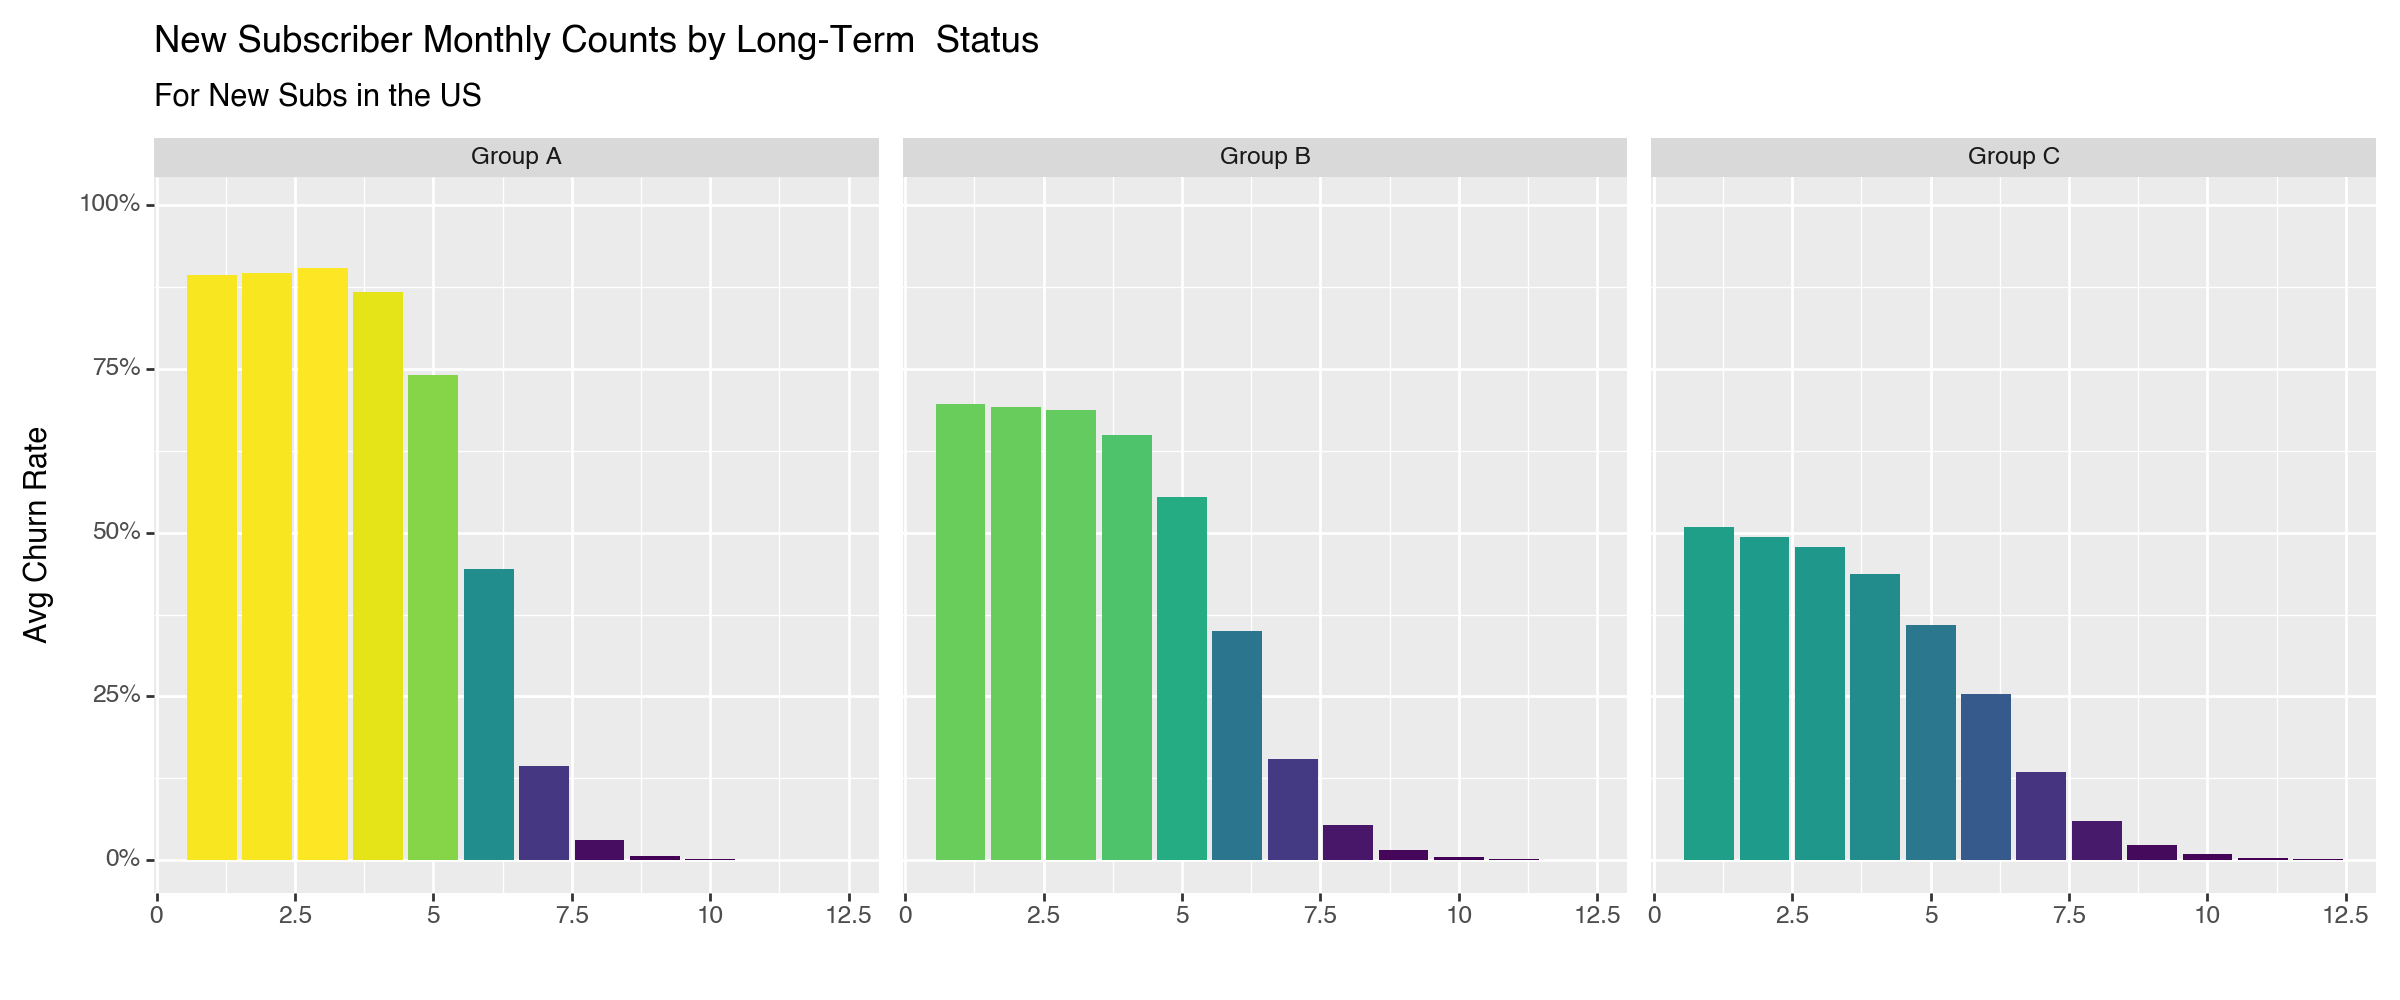

<Figure Size: (1200 x 500)>

In [126]:
(df
.groupby(['lifetime_month','group_member']) 
.agg(avg_churn_rate = ('churn_rate','mean')) 
.reset_index() 
.pipe(lambda df_: plot_col(df_, 
                           x = 'lifetime_month', 
                           y = 'avg_churn_rate', 
                           fill = 'avg_churn_rate',  
                           # text = 'avg_churn_rate', 
                           percent = 'avg_churn_rate',
                           facet = 'group_member') + 
                    theme(figure_size = (12, 5),
                          legend_position='none') + 
                    labs(title = "New Subscriber Monthly Counts by Long-Term  Status",
                         subtitle = 'For New Subs in the US',
                         x = ''))) 

In [112]:
(df.head())

,year_month,group_member,lifetime_month,churn_rate
0,2022-01,Group A,1,0.888495
1,2022-01,Group A,2,0.939369
2,2022-01,Group A,3,0.914716
3,2022-01,Group A,4,0.877573
4,2022-01,Group A,5,0.730978


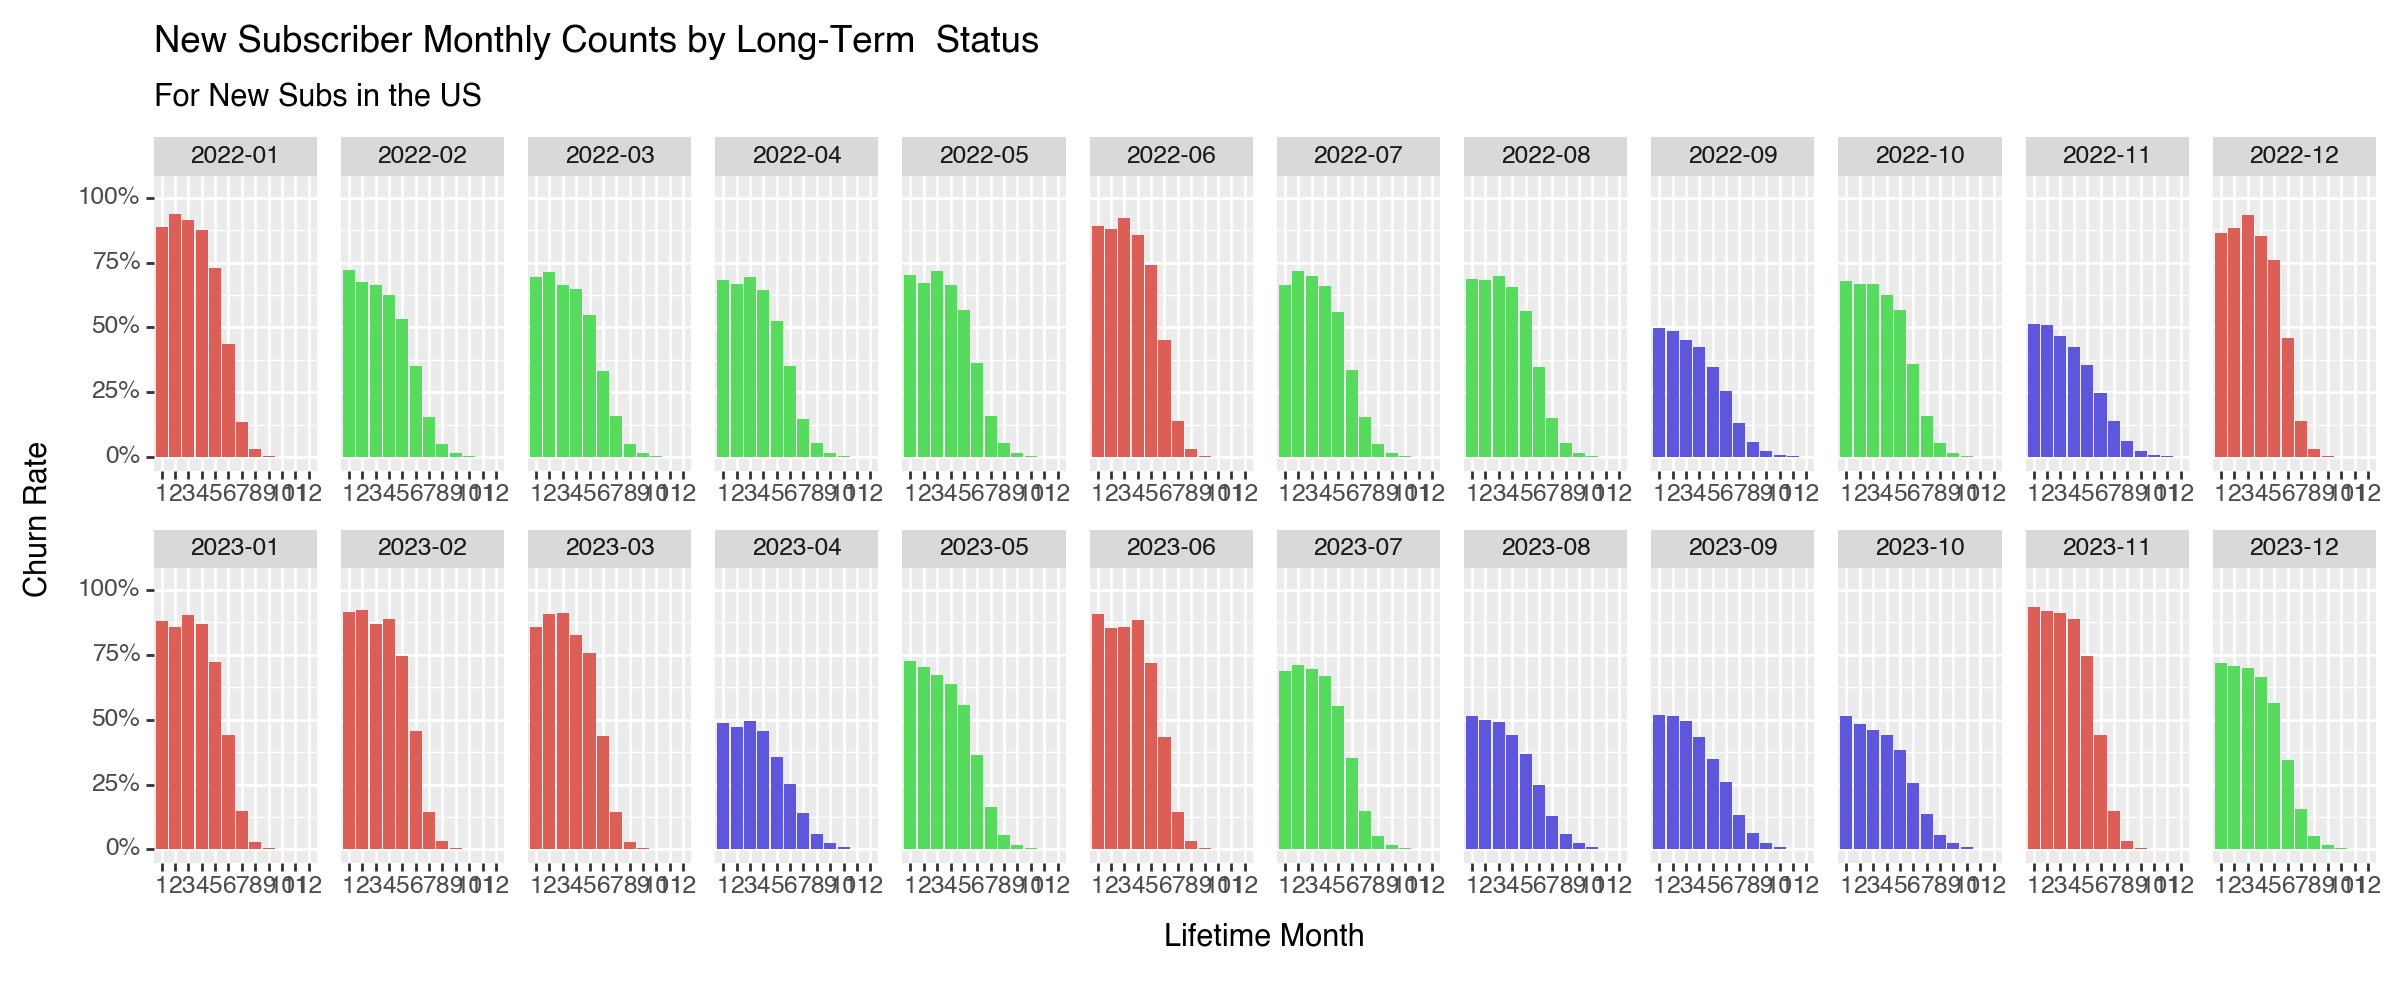

<Figure Size: (1200 x 500)>

In [159]:
(df
.pipe(lambda df_: plot_col(df_, 
                           x = 'factor(lifetime_month)', 
                           y = 'churn_rate', 
                           fill = 'group_member',  
                           percent = 'churn_rate', 
                           # text = 'churn_rate', 
                           facet = 'year_month',
                           facet_scales = 'free_x', 
                           nrow = 2, 
                           position = 'dodge') +                            
theme(figure_size = (12, 5),
      legend_position='none') + 
labs(title = "New Subscriber Monthly Counts by Long-Term  Status",
     subtitle = 'For New Subs in the US',
     x = 'Lifetime Month'))) 